In [12]:
import networkx as nx
import random
import matplotlib.pyplot as plt
import requests

In [13]:
def download_file(url, file_name):
    r = requests.get(url, allow_redirects=True)
    open(file_name, 'wb').write(r.content)

In [2]:
def tree_draw_prepare(G, root=None, width=1., vert_gap = 0.2, vert_loc = 0, xcenter = 0.5):
    if not nx.is_tree(G):
        raise TypeError('Граф не является связным и ациклическим')

    if root is None:
        if isinstance(G, nx.DiGraph):
            root = next(iter(nx.topological_sort(G)))
        else:
            root = random.choice(list(G.nodes))

    def _hierarchy_pos(G, root, width=1., vert_gap = 0.2, vert_loc = 0, xcenter = 0.5, pos = None, parent = None):
        if pos is None:
            pos = {root:(xcenter,vert_loc)}
        else:
            pos[root] = (xcenter, vert_loc)
        children = list(G.neighbors(root))
        if not isinstance(G, nx.DiGraph) and parent is not None:
            children.remove(parent)  
        if len(children)!=0:
            dx = width/len(children) 
            nextx = xcenter - width/2 - dx/2
            for child in children:
                nextx += dx
                pos = _hierarchy_pos(G,child, width = dx, vert_gap = vert_gap, 
                                    vert_loc = vert_loc-vert_gap, xcenter=nextx,
                                    pos=pos, parent = root)
        return pos
            
    return _hierarchy_pos(G, root, width, vert_gap, vert_loc, xcenter)

In [5]:
def plot_tree_graph(path_to_xml):
    nx_graph = nx.readwrite.graphml.read_graphml(path_to_xml)
    pos = tree_draw_prepare(nx_graph,list(nx_graph.nodes)[0])
    nx.draw(nx_graph, pos=pos, with_labels=True)

In [14]:
"""Тестовая XML с графом предварительно загружена на яндекс-диск"""
download_file('https://getfile.dokpub.com/yandex/get/https://disk.yandex.ru/d/WVkAo9fKqQpQxg', 'test.xml')

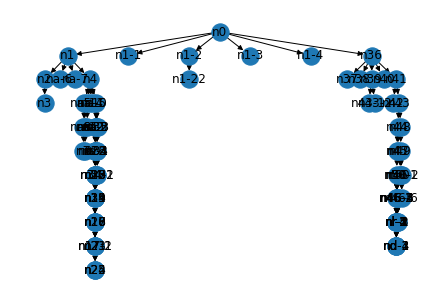

In [6]:
plot_tree_graph('test.xml')